<a href="https://colab.research.google.com/github/SebastianSasaki/cc41_tf_201910349_201915516_201910081_202117686_201917229/blob/main/BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import graphviz as gv #Graficos
import numpy as np
import heapq as hq
import pandas as pd #Leer CSV
import matplotlib.pyplot as plt # Gragicos final
import math as math #Operaciones matematicas
from timeit import timeit

def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

Arreglo de prueba

In [3]:
%%file 1.in
1 2 4 7
0 5
0 12
6 10
0 
1 4 6 8
3 5 9
0 8 14
5 7
6 10 12 13
3 9 13 17
12 15
2 9 11 15 16
9 10
7 15
11 12 14 16
12 15 17
10 16

Writing 1.in


 0: [1, 2, 4, 7]
 1: [0, 5]
 2: [0, 12]
 3: [6, 10]
 4: [0]
 5: [1, 4, 6, 8]
 6: [3, 5, 9]
 7: [0, 8, 14]
 8: [5, 7]
 9: [6, 10, 12, 13]
10: [3, 9, 13, 17]
11: [12, 15]
12: [2, 9, 11, 15, 16]
13: [9, 10]
14: [7, 15]
15: [11, 12, 14, 16]
16: [12, 15, 17]
17: [10, 16]


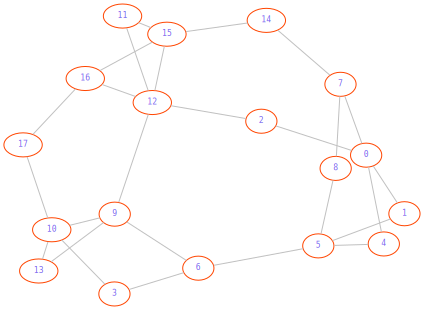

In [41]:
G, _ = readAdjl("1.in")
for i, edges in enumerate(G):
  print(f"{i:2}: {edges}")
adjlShow(G)

# En el presente analisaremos el codigo del Algoritmo BFS, para comprobar la efectividad que tendría en la aplicación del grafo final, para la hallar la ruta mas corta de los almacenes hacia los puntos de entrega

In [22]:
#Donde V es el numero de vertices, y A es el numero de Aristas

def bfs(G, s):
  n = len(G)          #2
  visited = [False]*n #1
  parent = [None]*n   #1
  queue = [s]         #1
  visited[s] = True   #2

  while queue:              #V * (        ---------------------->  O(V)
    u = queue.pop(0)          #2 +
    for v in G[u]:            #A (        ---------->A(6)--------> O(A)
      if not visited[v]:          #1 + (
        visited[v] = True           #2
        parent[v] = u               #2
        queue.append(v)             #1))

  
  #Por lo cual :O(V+A)

  return parent

# Teniendo la notación O(V+A) podemos apreciar que este depende de la cantidad de vertices y de Aristas presentes en el grafo. Por lo cual podemos apreciar que el tiempo de ejecución aumentara proporcionalmente con el tamaño del grafo y las aristas que este presente

Veremos cuantos Vertices y Aristas presenta el grafo utilizado en este proyecto

*   Vertices: 1000000
*   Aristas Esquinas(4): 4 * **2** = 8 
*   Aristas Centrales (1000000-3996): 99604 *  **4** = 3984016
*   Aristas Laterales (396):3969 * **3** -8  = 11980

Aproximadamente la notación siguiendo el caso real : O (1000000 + 3996004)

Además teniendo en cuenta que el algoritmo debe repetirse unas 60 veces (una por cada almacen existente) hace de este algoritmo una solución no tan optima



# Por lo cual, tal vez,  una forma de mejorar este algoritmo es que se detenga cuando halla recorrido atravez de todos los puntos de entrega. Lo cual veremos a continuación: 

In [59]:
#Crear un arreglo en donde marcaremos las posiciones en donde queremos que el algoritmo se detenga

Limitvisited = [False]*10
K = [3, 9]

for i in K:
  Limitvisited[i] = True

print(Limitvisited)

[False, False, False, True, False, False, False, False, False, True]


In [58]:
def bfs2(G, s):
  n = len(G)          #2
  visited = [False]*n #1
  parent = [None]*n   #1
  queue = [s]         #1
  visited[s] = True   #2
  count = 0
  


  while queue:              #V * (        ---------------------->  O(V)
    u = queue.pop(0)          #2 +
    for v in G[u]:            #A (        ---------->A(6)--------> O(A)
      if not visited[v]:          #1 + (
        visited[v] = True           #2
        parent[v] = u               #2
        queue.append(v)             #1))
      for n in visited:
        if(visited[n] == Limitvisited[n] and visited[n] == True):       
          count = count + 1
        if(count == len(K)):
          print("a")
  #Por lo cual :O(V+A)

  return parent

In [60]:

#path = bfs(G, 6)
#print(path)
#adjlShow(G, path=path)
bfs2(G, 6)


[1, 5, 12, 6, 5, 6, None, 8, 5, 6, 3, 12, 9, 9, 7, 12, 12, 10]

In [40]:
K = [False]*10
Y = [False]*19

if (K == Y):  
  print("HOLA")